In [1]:
import matplotlib.pyplot as plt
import os, re
import pandas as pd
import numpy as np

from datetime import datetime as dt
import cPickle as pickle
import re #Regex
import seaborn as sns
sns.set()
%matplotlib inline

# 1. Evaluating Crawling Indicator

In [38]:
# %time DATACrawl = pickle.load( open( "v1.4\DATA_ANALSISIS_crawl.p", "rb" ) )
%time DATACrawl = pickle.load( open( "v1.4\DATA_CRAWL-v4c.p", "rb" ) )
crawlIndicator = pd.DataFrame([DATACrawl.crawlMem,DATACrawl.crawlTime]).transpose()
crawlIndicator.describe()

Wall time: 41 ms


,crawlMem,crawlTime
count,148.000000,148.000000
mean,3571.027027,0.872446
std,782.478827,4.687685
min,2088.000000,0.077400
25%,2936.000000,0.134975
50%,3932.000000,0.149150
75%,4080.000000,0.285525
max,6832.000000,54.813600


In [39]:
DATA_ANALSISIS_crawl    = DATACrawl[DATACrawl.flag.isin([-1, 1])]

DATA_ANALSISIS_crawlPos = DATA_ANALSISIS_crawl[DATA_ANALSISIS_crawl.flag == 1]
DATA_ANALSISIS_crawlNeg = DATA_ANALSISIS_crawl
crawlAnalysis = pd.DataFrame([DATA_ANALSISIS_crawlPos.crawlMem,DATA_ANALSISIS_crawlPos.crawlTime,
                              DATA_ANALSISIS_crawlNeg.crawlMem,DATA_ANALSISIS_crawlNeg.crawlTime]).transpose()
crawlAnalysis.columns = ['Memory Positif','Time Positif','Memory Semua','Time Semua']
print 'Memory Positif : ',sum(DATA_ANALSISIS_crawlPos.crawlMem), 'Byte'
print 'Memory Semua   : ',sum(DATA_ANALSISIS_crawlNeg.crawlMem), 'Byte'
print 'Time Positif   : ',sum(DATA_ANALSISIS_crawlPos.crawlTime), 'Detik'
print 'Time Semua     : ',sum(DATA_ANALSISIS_crawlNeg.crawlTime),'Detik'
crawlAnalysis.describe()

Memory Positif :  340288.0 Byte
Memory Semua   :  528512.0 Byte
Time Positif   :  48.7722 Detik
Time Semua     :  129.122 Detik


,Memory Positif,Time Positif,Memory Semua,Time Semua
count,97.000000,97.000000,148.000000,148.000000
mean,3508.123711,0.502806,3571.027027,0.872446
std,867.912525,1.370002,782.478827,4.687685
min,2368.000000,0.090900,2088.000000,0.077400
25%,2520.000000,0.132100,2936.000000,0.134975
50%,3920.000000,0.148100,3932.000000,0.149150
75%,4072.000000,0.244300,4080.000000,0.285525
max,6832.000000,12.173000,6832.000000,54.813600


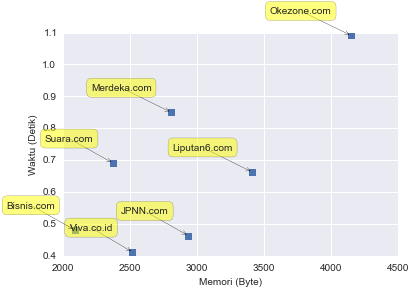

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8]
labels = ['Viva.co.id',  'Merdeka.com', 'Liputan6.com', 'Okezone.com', 'JPNN.com', 'Suara.com', 'Bisnis.com']
y1 = [DATACrawl[DATACrawl.sumber == i].crawlMem.mean() for i in x]
y2 = [DATACrawl[DATACrawl.sumber == i].crawlTime.mean() for i in x]

plt.plot(y1, y2,'s')
plt.xlabel('Memori (Byte)', fontsize=10)
plt.ylabel('Waktu (Detik)', fontsize=10)
for label, x, y in zip(labels, y1, y2):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
plt.show()

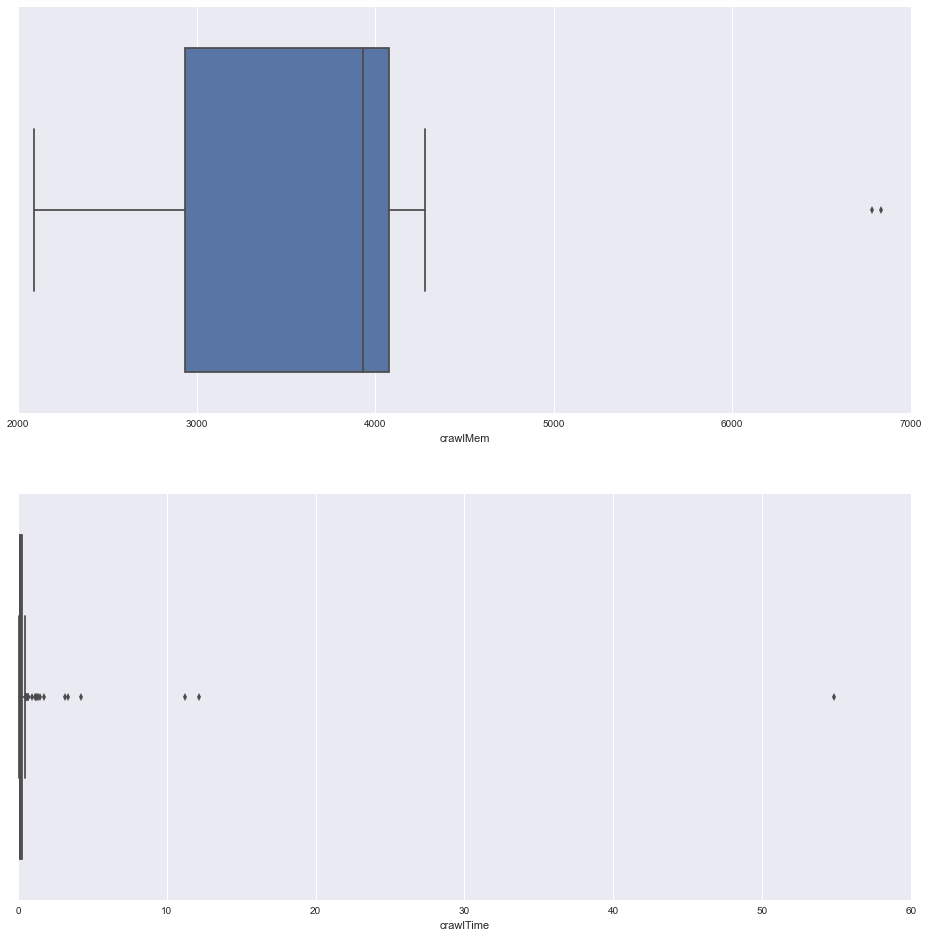

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2,figsize=(16,16))

sns.boxplot(crawlIndicator.crawlMem, orient = 'h',ax=ax[0])
sns.boxplot(crawlIndicator.crawlTime, orient = 'h', ax=ax[1])

plt.show()

#### Terlihat total penggunaan waktu dan memory sangat signifikan, hal tersebut karena jumlah berita positif dan negatif yang berbeda jauh

# 2.Evaluating the Classifier v1.4 vs v1.6 vs v2.0


## 2.1 Load from the 'Pickled' dump

In [64]:
DATAStd  = pd.DataFrame()
DATAPost = pd.DataFrame()

#Load standard striped Text
%time DATAStd['Judul'] = pickle.load( open( "v1.4\DATA_JUDULStriped-v4c.p", "rb" ) )
%time DATAStd['Short'] = pickle.load( open( "v1.4\DATA_SHORTStriped-v4c.p", "rb" ) )
%time DATAStd['Long']  = pickle.load( open( "v1.4\DATA_LONGStriped-v4c.p", "rb" ) )

#Load from PosTagged Noun and verb only Text
%time DATAPost['Judul'] = pickle.load( open( "v1.6\DATA_JUDULpostag-v5c.p", "rb" ) )
%time DATAPost['Short'] = pickle.load( open( "v1.6\DATA_SHORTpostag-v5c.p", "rb" ) )
%time DATAPost['Long']  = pickle.load( open( "v1.6\DATA_LONGpostag-v5c.p", "rb" ) )

#Load number of total tag in Text
%time AllFracJudul = pickle.load( open( "v2.0\DATA_JUDUL-v6c.p", "rb" ) )
%time AllFracShort = pickle.load( open( "v2.0\DATA_SHORT-v6c.p", "rb" ) )
%time AllFracLong  = pickle.load( open( "v2.0\DATA_LONG-v6c.p", "rb" ) )

#Load number of total noun-verb only in Text
# %time NVFracJudul = pickle.load( open( "v2.0\DATA_JUDUL-v2.p", "rb" ) )
# %time NVFracShort = pickle.load( open( "v2.0\DATA_SHORT-v2.p", "rb" ) )
# %time NVFracLong  = pickle.load( open( "v2.0\DATA_LONG-v2.p", "rb" ) )

%time DATA_TARGET = pickle.load( open( "v1.4\DATA_TARGET-v4c.p", "rb" ) )

DATA_TARGET = DATA_TARGET.reset_index(drop=True)
DATAStd  = DATAStd.reset_index(drop=True)
DATAPost = DATAPost.reset_index(drop=True)

Wall time: 2 ms
Wall time: 3 ms
Wall time: 15 ms
Wall time: 5 ms
Wall time: 5 ms
Wall time: 9 ms
Wall time: 6 ms
Wall time: 7 ms
Wall time: 8 ms
Wall time: 2 ms


In [65]:
#We only use 2% of total negative instance
factor = 100.0/100
size   = int(factor*DATA_TARGET[DATA_TARGET.values == -1].count())
print 'Total Negative Instances    : ',DATA_TARGET[DATA_TARGET.values == -1].count()
print 'Training Negative Instances : ',size
print 'Training Positif Instances  : ',DATA_TARGET[DATA_TARGET.values == 1].count()

Total Negative Instances    :  51
Training Negative Instances :  51
Training Positif Instances  :  97


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
#Stopwords data source : https://www.illc.uva.nl/Research/Publications/Reports/MoL-2003-02.text.pdf
stopword_html = open("id.stopwords.01.01.2016.txt",'r').read()
stopwords     = stopword_html.split("\n")

vect1 = TfidfVectorizer(decode_error='ignore')
vect2 = TfidfVectorizer(stop_words=stopwords,decode_error='ignore')

vectStds = vect1.fit_transform(DATAStd['Long'])
vectStop = vect2.fit_transform(DATAStd['Long'])
vectPost = vect1.fit_transform(DATAPost['Long'])

In [45]:
vectStds

<148x4685 sparse matrix of type '<type 'numpy.float64'>'
	with 20663 stored elements in Compressed Sparse Row format>

In [46]:
vectStop

<148x4246 sparse matrix of type '<type 'numpy.float64'>'
	with 13657 stored elements in Compressed Sparse Row format>

In [47]:
vectPost

<148x4406 sparse matrix of type '<type 'numpy.float64'>'
	with 15264 stored elements in Compressed Sparse Row format>

In [48]:
print AllFracLong.shape

(148L, 29L)


In [49]:
print (1871*28112)-331527
print (1871*27489)-229366
print (1871*25228)-233748

52266025
51202553
46967840


#### Data Teks berita yang sudah dibersihkan dari tag HTML di v1.4

In [50]:
print DATAStd.Judul.head(1).values

['laba anjlok  astra agro lestari tak bagi dividen']


#### Data Teks berita yang sudah di-POSTag verb dan noun di v1.6

In [51]:
print DATAPost.Judul.head(1).values

['laba anjlok astra agro lestari dividen']


#### Data Teks berita yang sudah diambil fraction verb dan noun di v2.0

In [52]:
AllFracJudul[:1]

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.]])

## 2. Evaluate

### Preprocessing

![smiley](img/evaluasi_preproc.png)

In [53]:
#Stopwords data source : https://www.illc.uva.nl/Research/Publications/Reports/MoL-2003-02.text.pdf
stopword_html = open("id.stopwords.01.01.2016.txt",'r').read()
stopwords     = stopword_html.split("\n")

In [54]:
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report, roc_auc_score,roc_curve,auc
from scipy import interp
import datetime

def skorStratCV(clf,X,y,nfolds=10):
    metrics = []
    
    trainTime,testTime = [],[]
    precis,recals,f1s,accs,rocs = [],[],[],[],[]
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    skf = cross_validation.StratifiedKFold(y, n_folds=nfolds)
    for train_index, test_index in skf:
        X_train,y_train = X[train_index],y[train_index]
        X_test,y_test   = X[test_index],y[test_index]
        
        #training time
        start = dt.now()
        clf.fit(X_train, y_train)
        end = dt.now()
        trainTime.append((end-start).microseconds)
        
        #testing time
        start = dt.now()
        yhat = clf.predict(X_test)
        end = dt.now()
        testTime.append((end-start).microseconds)
        
        #score
        precis.append(precision_score(y_test, yhat, average='binary'))
        recals.append(recall_score(y_test, yhat, average='binary'))
        f1s.append(f1_score(y_test, yhat, average='binary'))
        accs.append(accuracy_score(y_test, yhat))
        
        probas_              = clf.fit(X_train, y_train).predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        mean_tpr            += interp(mean_fpr, fpr, tpr)
        mean_tpr[0]          = 0.0
        
    def ave(lis):
        return sum(lis)/len(lis)
    
    metrics.append(ave(trainTime)+ave(testTime))
#     metrics.append(ave(testTime))
    metrics.append(ave(precis))
    metrics.append(ave(recals))
    metrics.append(ave(f1s))
    metrics.append(ave(accs))
    
    mean_tpr /= nfolds
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    metrics.append(mean_auc)
    
    return metrics,mean_fpr,mean_tpr

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

mnb = MultinomialNB(alpha=0.1)
#knn = KNeighborsClassifier()
svc = SVC(kernel='linear',cache_size=800,probability=True)
#tre = DecisionTreeClassifier(class_weight='balanced')

vectCnts = TfidfVectorizer(decode_error='ignore')
vectStds = TfidfVectorizer(decode_error='ignore')
#vectStop = TfidfVectorizer(stop_words=stopwords,decode_error='ignore')

kombinasi13 = [{'name' : 'MNB', 'pipe' : Pipeline([('vect', vectCnts),('clf', mnb)])},
               #{'name' : 'KNN', 'pipe' : Pipeline([('vect', vect),('clf', knn)])},
               {'name' : 'SVM', 'pipe' : Pipeline([('vect', vectCnts),('clf', svc)])},
               #{'name' : 'TREE', 'pipe' : Pipeline([('vect', vect),('clf', tre)])}
              ]

kombinasi24= [{'name' : 'MNB', 'pipe' : Pipeline([('vect', vectStds),('clf', mnb)])},
             #{'name' : 'KNN', 'pipe' : Pipeline([('vect', vect),('clf', knn)])},
             {'name' : 'SVM', 'pipe' : Pipeline([('vect', vectStds),('clf', svc)])},
             #{'name' : 'TREE', 'pipe' : Pipeline([('vect', vect),('clf', tre)])}
             ]

kombinasi5 = [{'name' : 'MNB', 'pipe' : mnb},
               {'name' : 'SVM', 'pipe' : svc},
             ]

In [56]:
kombinasi13[0]['pipe']

Pipeline(steps=[('vect', TfidfVectorizer(analyzer=u'word', binary=False, decode_error='ignore',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))])

In [57]:
print len(AllFracJudul)
print len(AllFracShort)
print len(AllFracJudul+AllFracShort)

148
148
148


In [59]:
k = 'aku akan memakan semua makanan itu'

def stopwordRemoval(text):
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

print stopwordRemoval(k)
JudulStop = DATAStd['Judul'].map(lambda x: stopwordRemoval(x))
ShortStop = DATAStd['Short'].map(lambda x: stopwordRemoval(x))
LongStop  = DATAStd['Long'].map(lambda x: stopwordRemoval(x))
Feed1Stop  = JudulStop+' '+ShortStop
Feed2Stop  = JudulStop+' '+LongStop+' '+ShortStop

JudulPostStop = DATAPost['Judul'].map(lambda x: stopwordRemoval(x))
ShortPostStop = DATAPost['Short'].map(lambda x: stopwordRemoval(x))
LongPostStop  = DATAPost['Long'].map(lambda x: stopwordRemoval(x))
Feed1PostStop  = JudulPostStop+' '+ShortPostStop
Feed2PostStop  = JudulPostStop+' '+LongPostStop+' '+ShortPostStop

# print DATAStd['Judul'][198]
# print JudulStop[198]

memakan makanan


In [68]:
X0 = []
# X0.append({'name':'Judul','Prep':'Kombinasi1','Data':DATAStd['Judul']})
# X0.append({'name':'Short','Prep':'Kombinasi1','Data':DATAStd['Short']})
# X0.append({'name':'Long' ,'Prep':'Kombinasi1','Data':DATAStd['Long']})
X0.append({'name':'Feed1' ,'Prep':'Kombinasi1','Data':DATAStd['Judul']+' '+DATAStd['Short']})
X0.append({'name':'Feed2' ,'Prep':'Kombinasi1','Data':DATAStd['Judul']+' '+DATAStd['Long']+' '+DATAStd['Short']})


# X1 = []
# X1.append({'name':'Judul','Prep':'Kombinasi2','Data':JudulStop})
# X1.append({'name':'Short','Prep':'Kombinasi2','Data':ShortStop})
# X1.append({'name':'Long' ,'Prep':'Kombinasi2','Data':LongStop})
# X1.append({'name':'Feed' ,'Prep':'Kombinasi2','Data':FeedStop})

# X2 = []
# X2.append({'name':'Judul','Prep':'Kombinasi3','Data':DATAPost['Judul']})
# X2.append({'name':'Short','Prep':'Kombinasi3','Data':DATAPost['Short']})
# X2.append({'name':'Long' ,'Prep':'Kombinasi3','Data':DATAPost['Long']})
# X2.append({'name':'Feed' ,'Prep':'Kombinasi3','Data':DATAPost['Judul']+' '+DATAPost['Short']})

X3 = []
# X3.append({'name':'Judul','Prep':'Kombinasi4','Data':JudulPostStop})
# X3.append({'name':'Short','Prep':'Kombinasi4','Data':ShortPostStop})
# X3.append({'name':'Long' ,'Prep':'Kombinasi4','Data':LongPostStop})
X3.append({'name':'Feed1' ,'Prep':'Kombinasi2','Data':Feed1PostStop})
X3.append({'name':'Feed2' ,'Prep':'Kombinasi2','Data':Feed2PostStop})

X4 = []
# X4.append({'name':'Judul','Prep':'Kombinasi5','Data':AllFracJudul})
# X4.append({'name':'Short','Prep':'Kombinasi5','Data':AllFracShort})
# X4.append({'name':'Long' ,'Prep':'Kombinasi5','Data':AllFracLong})
X4.append({'name':'Feed1' ,'Prep':'Kombinasi3','Data':AllFracJudul+AllFracShort})
X4.append({'name':'Feed2' ,'Prep':'Kombinasi3','Data':AllFracJudul+AllFracLong+AllFracShort})

# X2.append({'name':'Judul','Prep':'NVTag','Data':NVFracJudul})
# X2.append({'name':'Short','Prep':'NVTag','Data':NVFracShort})
# X2.append({'name':'Long' ,'Prep':'NVTag','Data':NVFracLong})

y_  = DATA_TARGET

## Kombinasi 1

In [69]:
for i in X0:
    k     = vect1.fit_transform(i['Data'])
    print k.get_shape()

(148, 1222)
(148, 4752)


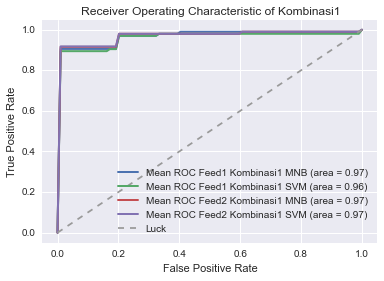

In [70]:
import matplotlib.pyplot as plt

metric = []
for xi in X0:
    X_ = xi['Data']
    for mod in kombinasi13:
        xP = X_[y_[y_.values == 1].index]
        xN = X_[y_[y_.values == -1].index][:size]
        X  = np.append(xP,xN)
        
        yP = y_[y_.values == 1]
        yN = y_[y_.values == -1][:size]
        y  = np.append(yP,yN)
        
        metrics,mean_fpr,mean_tpr = skorStratCV(mod['pipe'],X,y)
        name = xi['name']+' '+xi['Prep']+' '+mod['name']
        plt.plot(mean_fpr, mean_tpr,label='Mean ROC %s (area = %0.2f)' % (name,metrics[5]), lw=2)
        
        metric.append({'name':name,'metrics':metrics})

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Kombinasi1')
plt.legend(loc="lower right")
plt.show()

## Kombinasi 2

In [ ]:
# for i in X1:
#     k     = vect2.fit_transform(i['Data'])
#     print k.get_shape()

In [ ]:
# #metric = []
# for xi in X1:
#     X_ = xi['Data']
#     for mod in kombinasi24:
#         xP = X_[y_[y_.values == 1].index]
#         xN = X_[y_[y_.values == -1].index][:size]
#         X  = np.append(xP,xN)
        
#         yP = y_[y_.values == 1]
#         yN = y_[y_.values == -1][:size]
#         y  = np.append(yP,yN)
        
#         metrics,mean_fpr,mean_tpr = skorStratCV(mod['pipe'],X,y)
#         name = xi['name']+' '+xi['Prep']+' '+mod['name']
#         plt.plot(mean_fpr, mean_tpr,label='Mean ROC %s (area = %0.2f)' % (name,metrics[5]), lw=2)
        
#         metric.append({'name':name,'metrics':metrics})

# plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic of Kombinasi2')
# plt.legend(loc="lower right")
# plt.show()

## Kombinasi 3

In [ ]:
# for i in X2:
#     k     = vect1.fit_transform(i['Data'])
#     print k.get_shape()

In [ ]:
# #metric = []
# for xi in X2:
#     X_ = xi['Data']
#     for mod in kombinasi13:
#         xP = X_[y_[y_.values == 1].index]
#         xN = X_[y_[y_.values == -1].index][:size]
#         X  = np.append(xP,xN)
        
#         yP = y_[y_.values == 1]
#         yN = y_[y_.values == -1][:size]
#         y  = np.append(yP,yN)
        
#         metrics,mean_fpr,mean_tpr = skorStratCV(mod['pipe'],X,y)
#         name = xi['name']+' '+xi['Prep']+' '+mod['name']
#         plt.plot(mean_fpr, mean_tpr,label='Mean ROC %s (area = %0.2f)' % (name,metrics[5]), lw=2)
        
#         metric.append({'name':name,'metrics':metrics})

# plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic of Kombinasi3')
# plt.legend(loc="lower right")
# plt.show()

## Kombinasi 4

In [71]:
for i in X3:
    k     = vect2.fit_transform(i['Data'])
    print k.get_shape()

(148, 988)
(148, 4211)


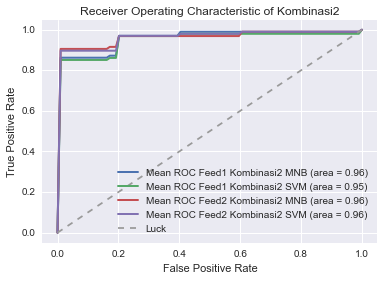

In [72]:
#metric = []
for xi in X3:
    X_ = xi['Data']
    for mod in kombinasi24:
        xP = X_[y_[y_.values == 1].index]
        xN = X_[y_[y_.values == -1].index][:size]
        X  = np.append(xP,xN)
        
        yP = y_[y_.values == 1]
        yN = y_[y_.values == -1][:size]
        y  = np.append(yP,yN)
        
        metrics,mean_fpr,mean_tpr = skorStratCV(mod['pipe'],X,y)
        name = xi['name']+' '+xi['Prep']+' '+mod['name']
        plt.plot(mean_fpr, mean_tpr,label='Mean ROC %s (area = %0.2f)' % (name,metrics[5]), lw=2)
        
        metric.append({'name':name,'metrics':metrics})

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Kombinasi2')
plt.legend(loc="lower right")
plt.show()

## Kombinasi 5

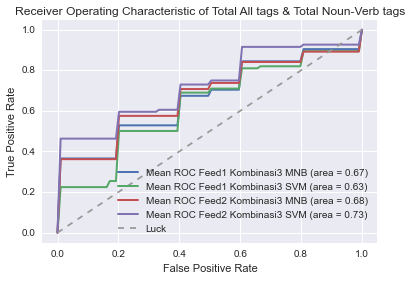

In [74]:
#metric = []
y2_  = pickle.load( open( "v2.0\DATA_TARGET-v6c.p", "rb" ) )
for xi in X4:
    X_ = xi['Data']
    for mod in kombinasi5:
        xP = X_[y2_[y2_.values == 1].index]
        xN = X_[y2_[y2_.values == -1].index][:size]
        X  = np.vstack((xP,xN))

        yP = y2_[y2_.values == 1]
        yN = y2_[y2_.values == -1][:size]
        y  = np.append(yP,yN)
        
        metrics,mean_fpr,mean_tpr = skorStratCV(mod['pipe'],X,y)
        name = xi['name']+' '+xi['Prep']+' '+mod['name']
        plt.plot(mean_fpr, mean_tpr,label='Mean ROC %s (area = %0.2f)' % (name,metrics[5]), lw=2)
        
        metric.append({'name':name,'metrics':metrics})

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Total All tags & Total Noun-Verb tags')
plt.legend(loc="lower right")
plt.show()

In [75]:
from ipy_table import *
metrics_table = []
tables = []
columns = (['id', 'nama','time','p_1',
            'r_1','F1 score','accuracy','AUC'])
tables.append(columns)

i = 0

for me in metric:
    i += 1
    
    metr = []
    metr.append(i)
    metr.append(me['name'])
    for m in me['metrics']:
        metr.append(m)

    tables.append(metr)
    metrics_table.append(metr)
    #print metric
    
make_table(tables)

# styling
apply_theme('basic_both')
set_column_style(7, align='center')

id,nama,time,p_1,r_1,F1 score,accuracy,AUC
1,Feed1 Kombinasi1 MNB,12600,0.8843,0.9500,0.9087,0.8717,0.9655
2,Feed1 Kombinasi1 SVM,32900,0.8708,0.9300,0.8883,0.8440,0.9577
3,Feed2 Kombinasi1 MNB,67700,0.8542,0.9600,0.8958,0.8449,0.9667
4,Feed2 Kombinasi1 SVM,216600,0.8890,0.9200,0.8927,0.8517,0.9671
5,Feed1 Kombinasi2 MNB,10900,0.8795,0.9500,0.9059,0.8659,0.9568
6,Feed1 Kombinasi2 SVM,24400,0.8637,0.9300,0.8824,0.8311,0.9485
7,Feed2 Kombinasi2 MNB,57000,0.8542,0.9400,0.8847,0.8316,0.9606
8,Feed2 Kombinasi2 SVM,132000,0.8801,0.9300,0.8921,0.8458,0.9611
9,Feed1 Kombinasi3 MNB,1100,0.6977,0.8222,0.7509,0.6464,0.6655
10,Feed1 Kombinasi3 SVM,17300,0.7000,0.8322,0.7582,0.6535,0.6284


In [76]:
evals = pd.DataFrame(metrics_table,columns=columns)
evals['Vars'] = [i.split()[0] for i in evals['nama']]
evals['Prep'] = [i.split()[1] for i in evals['nama']]
evals['Algs'] = [i.split()[2] for i in evals['nama']]
evals['Time'] = evals['time']
evals.drop('nama',axis=1,inplace=True)
evals.drop('id',axis=1,inplace=True)

In [77]:
evals.to_csv('Hasil5.csv')

In [ ]:
splitter1 = ['Judul','Short','Long']
# splitter2 = ['Kombinasi1','Kombinasi2','Kombinasi3','Kombinasi4','Kombinasi5']
splitter2 = ['Kombinasi1','Kombinasi2','Kombinasi3']
eval_teks = evals[evals.Prep.isin(splitter2)]
eval_teks = pd.DataFrame([eval_teks[eval_teks.Vars == i].mean() for i in splitter1]).transpose()
eval_teks.set_axis(1,splitter1)
eval_teks

In [ ]:
# splitter = ['Kombinasi1','Kombinasi2','Kombinasi3','Kombinasi4','Kombinasi5']
splitter = ['Kombinasi1','Kombinasi2','Kombinasi3']
eval_prep = pd.DataFrame([evals[evals.Prep == i].mean() for i in splitter]).transpose()
eval_prep.set_axis(1,splitter)
eval_prep

In [ ]:
splitter1 = ['MNB','SVM']
eval_teks = evals[evals.Algs.isin(splitter1)]
eval_teks = pd.DataFrame([eval_teks[eval_teks.Algs == i].mean() for i in splitter1]).transpose()
eval_teks.set_axis(1,splitter1)
eval_teks

In [ ]:
mnb

In [ ]:
#knn
# knn_params = {'n_neighbors': range(1,21), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree'],
#               'leaf_size': [15, 30, 50, 100], 'p': [1,2]}

In [ ]:
svc
# lsvm_params = {'loss':['hinge', 'squared_hinge'],'class_weight':['balanced']}

In [ ]:
#tre
# tree_param = {"criterion": ["gini", "entropy"],"class_weight" : ['balanced']}

In [2]:
from HTMLParser import HTMLParser
import string

class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ' '.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    striped  = s.get_data()                         #get HTML-Tags free text
    lowers   = striped.lower()                      #Lowercase all words
    nospace  = lowers.strip()                      #Remove leading and trailing white space
    alphanum = re.sub(r'[^a-zA-Z]', ' ', nospace)
    return str(alphanum)

In [13]:
import string
%time postagger = pickle.load(open( "POSTAGGER.p", "rb" ))
def onlyAZ(teks):
    return re.sub(r'[^a-zA-Z]',' ', teks)
    
def onlyNVFromSentence(teks):
    splitted = postagger.tag(onlyAZ(teks).split())
    nouns = [word for word,pos in splitted \
        if (pos == 'NN' or pos == 'NNP' or 
            pos == 'NNS' or pos == 'VB')]
    nounsSentence = string.join(nouns)
    return nounsSentence

def onlyNVFromParagraph(par):
    par = strip_tags(par)
    splittedPar = par.split('.')
    nounsPar = string.join([onlyNVFromSentence(i) for i in splittedPar])
    return  nounsPar.strip() 

Wall time: 3.99 s


In [57]:
DTRAIN = pickle.load( open( "v1.4\DTRAIN-v1.p", "rb" ) )
DTEST  = pickle.load( open( "v1.4\DTEST-v1.p", "rb" ) )

In [58]:
kombinasi13 = [{'name' : 'MNB', 'pipe' : Pipeline([('vect', vectCnts),('clf', mnb)])},
               #{'name' : 'KNN', 'pipe' : Pipeline([('vect', vect),('clf', knn)])},
               {'name' : 'SVM', 'pipe' : Pipeline([('vect', vectCnts),('clf', svc)])},
               #{'name' : 'TREE', 'pipe' : Pipeline([('vect', vect),('clf', tre)])}
              ]

kombinasi24= [{'name' : 'MNB', 'pipe' : Pipeline([('vect', vectStds),('clf', mnb)])},
             #{'name' : 'KNN', 'pipe' : Pipeline([('vect', vect),('clf', knn)])},
             {'name' : 'SVM', 'pipe' : Pipeline([('vect', vectStds),('clf', svc)])},
             #{'name' : 'TREE', 'pipe' : Pipeline([('vect', vect),('clf', tre)])}
             ]

In [54]:
X1K1_train = DTRAIN.judul+' '+DTRAIN.shortDesc
X1K2_train = DTRAIN.judul.map(lambda x:onlyNVFromParagraph(x))+' '+DTRAIN.shortDesc.map(lambda x:onlyNVFromParagraph(x))
y_train    = DTRAIN.flag
X2K1_train = DTRAIN.judul+' '+DTRAIN.longDesc+' '+DTRAIN.shortDesc
X2K2_train = DTRAIN.judul.map(lambda x:onlyNVFromParagraph(x))+' '+DTRAIN.longDesc.map(lambda x:onlyNVFromParagraph(x))+' '+DTRAIN.shortDesc.map(lambda x:onlyNVFromParagraph(x))

In [59]:
X1K1_test = DTEST.judul+' '+DTEST.shortDesc
X1K2_test = DTEST.judul.map(lambda x:onlyNVFromParagraph(x))+' '+DTEST.shortDesc.map(lambda x:onlyNVFromParagraph(x))
y_test    = DTEST.flag
X2K1_test = DTEST.judul+' '+DTEST.longDesc+' '+DTEST.shortDesc
X2K2_test = DTEST.judul.map(lambda x:onlyNVFromParagraph(x))+' '+DTEST.longDesc.map(lambda x:onlyNVFromParagraph(x))+' '+DTEST.shortDesc.map(lambda x:onlyNVFromParagraph(x))

In [60]:
print skorPrint(kombinasi13[0]['pipe'],X1K1_train,y_train,X1K1_test,y_test)
print skorPrint(kombinasi13[1]['pipe'],X2K1_train,y_train,X2K1_test,y_test)
print skorPrint(kombinasi13[0]['pipe'],X1K2_train,y_train,X1K2_test,y_test)
print skorPrint(kombinasi13[1]['pipe'],X2K2_train,y_train,X2K2_test,y_test)

AUC :  0.917901234568
None
AUC :  0.88950617284
None
AUC :  0.903086419753
None
AUC :  0.882716049383
None


In [51]:
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report, roc_auc_score,roc_curve,auc
from scipy import interp
import datetime

def skorPrint(pipa,XK_train,y_train,XK_test,y_test):
    pipa.fit(XK_train,y_train)
    yhat = pipa.predict(XK_test)
    probas_ = pipa.fit(XK_train, y_train).predict_proba(XK_test)
    
#     print 'Precision : ',precision_score(y_test, yhat, average='binary')
#     print 'Recall    : ',recall_score(y_test, yhat, average='binary')
#     print 'F1-Score  : ',f1_score(y_test, yhat, average='binary')
#     print 'Accuracy  : ',accuracy_score(y_test, yhat)

    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
#     print 'TPR : ',tpr
#     print 'FPR : ',fpr
    print 'AUC : ',auc(fpr, tpr)
#     print thresholds